# Распознавания изображений моделей одежды на основе обученной и сохранённой нейронной сети

Учебный курс "[Программирование нейросетей на Python](https://www.asozykin.ru/courses/nnpython)".

In [1]:
from tensorflow.keras.models import load_model
from google.colab import files
from IPython.display import Image
from tensorflow.keras.preprocessing import image
import numpy as np

In [3]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

## Загружаем предварительно обученную нейронную сеть

Закачиваем файл с обученной моделью

In [22]:
!wget https://github.com/vasiliyeskin/MachineLearningExperiences/raw/master/FashionMNIST/fashion_mnist_dense_Es.h5 -O fashion_mnist_dense_Es.h5

--2020-07-31 15:13:45--  https://github.com/vasiliyeskin/MachineLearningExperiences/raw/master/FashionMNIST/fashion_mnist_dense_Es.h5
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vasiliyeskin/MachineLearningExperiences/master/FashionMNIST/fashion_mnist_dense_Es.h5 [following]
--2020-07-31 15:13:46--  https://raw.githubusercontent.com/vasiliyeskin/MachineLearningExperiences/master/FashionMNIST/fashion_mnist_dense_Es.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2561032 (2.4M) [application/octet-stream]
Saving to: ‘fashion_mnist_dense_Es.h5’

fashion_mnist_dense 100%[===================>]   2.4

Загружаем модель в память

In [24]:
model = load_model('fashion_mnist_dense_Es.h5')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________


## Загружаем в Colab изображение для распознавания

In [27]:
f = files.upload()

Saving bag.jpg to bag.jpg


In [28]:
!ls

bag.jpg  fashion_mnist_dense_Es.h5  fashion_mnist_dense.h5  sample_data


In [29]:
img_path = 'bag.jpg'

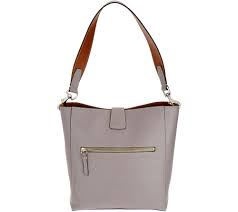

In [30]:
Image(img_path, width=150, height=150)

## Распознаем изображение

Загружаем изображение из файла с помощью инструментов Keras

In [31]:
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

Предварительная обработка изображения

In [32]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

Запускаем распознавание

In [33]:
prediction = model.predict(x)

Результаты распознавания

In [34]:
prediction

array([[9.9951901e-02, 1.6045223e-03, 2.5738506e-02, 3.0268914e-01,
        1.3439311e-02, 9.8045655e-03, 2.9870909e-02, 6.6106380e-03,
        5.1024967e-01, 4.0873529e-05]], dtype=float32)

In [35]:
prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 8
Название класса: сумка
